# Ep 05 - Neural Networks on Mnist

## Gabriel Oliveira Alves

## Preparation

First we import the data in the same way we did in the previous assignment

In [1]:
from tensorflow.keras.datasets import mnist

(X_train_all, y_train_all), (X_test_all, y_test_all) = mnist.load_data()

print(X_train_all.shape, y_train_all.shape)
print(X_test_all.shape, y_test_all.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Here we pick 2000 examples from each class (i.e. each digit between 0 and 9). We should end up with 20000 examples of 28 x 28 images:

In [2]:
import numpy as np

number_examples = 2000

X_train=np.empty((0, 28, 28))
y_train=np.empty(0, int)

for digit in range (0,10):
    
    # Finds the index for each class in the y set
    matching_index= np.where(y_train_all == digit)
    matching_digit= np.random.choice(matching_index[0], number_examples, replace=False)
    
    # Picks the entries which correspond to this class
    X_tmp = X_train_all[matching_digit]
    y_tmp = y_train_all[matching_digit]
    
    # Concatenates them
    X_train = np.concatenate((X_train, X_tmp), axis=0)
    y_train = np.append(y_train, y_tmp)
    
X_train.shape, y_train.shape

((20000, 28, 28), (20000,))

We will shuffle these vectors shuffling the indexes (we have 20.000 examples in total): 

In [3]:
# We use these lines to shuffle the indexes, creating a shuffled set in the end
indexes = np.arange(10 * number_examples)
np.random.shuffle(indexes)
print("Shuffled indexes: ", indexes)

# Now we shuffle the array itself
X_train = X_train[indexes]
y_train = y_train[indexes]

Shuffled indexes:  [18958  9539 13646 ...  1657 18715 11122]


Just to check we properly shuffled it, we print a few examples:

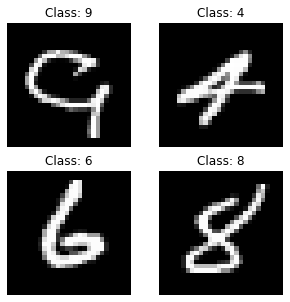

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(2, 2, figsize = (5, 5))

for i in range(4):
    ax[i//2, i%2].imshow(X_train[i], cmap='gray')
    ax[i//2, i%2].axis('off')
    ax[i//2, i%2].set_title("Class: %d"%y_train[i])
    
plt.show()

Now we normalize the data and flatten it:

In [5]:
# We find the biggest entry in the set and normalize the array
normalization_train = np.amax(X_train)
X_train = X_train/normalization_train

normalization_test = np.amax(X_test_all)
X_test_all = X_test_all/normalization_test

# The vector is flattened into a big vector
X_train = X_train.reshape(len(X_train), -1)
X_test = X_test_all.reshape(len(X_test_all), -1)
y_test = y_test_all

print("Train Set Shape:", X_train.shape, y_train.shape)
print("Test Set Shape:", X_test.shape, y_test.shape)

Train Set Shape: (20000, 784) (20000,)
Test Set Shape: (10000, 784) (10000,)


## Problems

Now that we have the data in the appropriate format in our hands we can proceed to follow the three parts in the problem statement

# Part 1 - Organizing the Data

In [6]:
# Showing the data format
def print_results(data):
    print('dtype:', data.dtype)
    print('shape:', data.shape)
    print('minimum value:', data.min())
    print('maximum value:', data.max())
    print('\n')

print('X_train: ')
print_results(X_train)

print('y_train: ')
print_results(y_train)

print('X_test: ')
print_results(X_test)

print('y_test: ')
print_results(y_test)

X_train: 
dtype: float64
shape: (20000, 784)
minimum value: 0.0
maximum value: 1.0


y_train: 
dtype: int64
shape: (20000,)
minimum value: 0
maximum value: 9


X_test: 
dtype: float64
shape: (10000, 784)
minimum value: 0.0
maximum value: 1.0


y_test: 
dtype: uint8
shape: (10000,)
minimum value: 0
maximum value: 9




Now we plot the images and their classes, as asked:

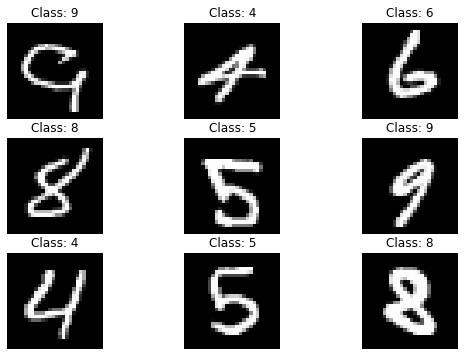

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# subplots defines how we divide the plot grid
fig, ax = plt.subplots(3, 3, figsize = (9, 6))

for i in range(9):
    ## The operator // works as floor division.
    ax[i//3, i%3].imshow(X_train[i].reshape(28,28), cmap='gray') # This command "plots" an array based on its entries values
    ax[i//3, i%3].axis('off')
    ax[i//3, i%3].set_title("Class: %d"%y_train[i])
    
plt.show()

# Part II - Testing Different Architetures

Now we set up the StratifiedKFold

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

In [8]:
from sklearn.model_selection import StratifiedKFold

# 5-fold validation
skf = StratifiedKFold(n_splits = 5)

skf.get_n_splits(X_train, y_train)

5

Now we set up the classifier. We use the reference in their documentation (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html):

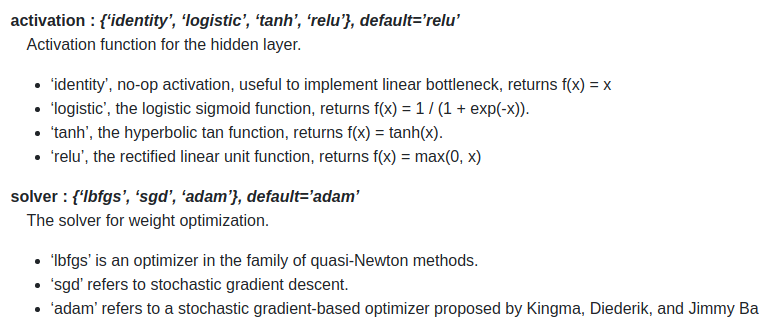

To work with different architectures, we'll try to change the activation (using relu and tanh), and the network structure itself, with a bottle-neck-like structure in architectures 3 and 4:

- Architecture 1: Relu - Single Layer
- Architecture 2: Tanh - Single Layer
- Architecture 3: Relu - Multiple Layers
- Architecture 4: Tanh - Multiple Layers

In [9]:
from sklearn.neural_network import MLPClassifier

# Defining the different architectures
architeture1 = MLPClassifier(hidden_layer_sizes=(512,), activation='relu', solver = 'adam',random_state=0, max_iter=10)
architeture2 = MLPClassifier(hidden_layer_sizes=(512,), activation='tanh', solver = 'adam', random_state=0, max_iter=10)
architeture3 = MLPClassifier(hidden_layer_sizes=(32, 16, 8), activation='relu', solver = 'adam', random_state=0, max_iter=10)
architeture4 = MLPClassifier(hidden_layer_sizes=(32, 16, 8), activation='tanh', solver = 'adam', random_state=0, max_iter=10)

### A quick extra test

Let's print a few predictions just to test if everything works fine. In the first 10 tests for the first architeture we have. We compare the prediction with the class given in y_test:

/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


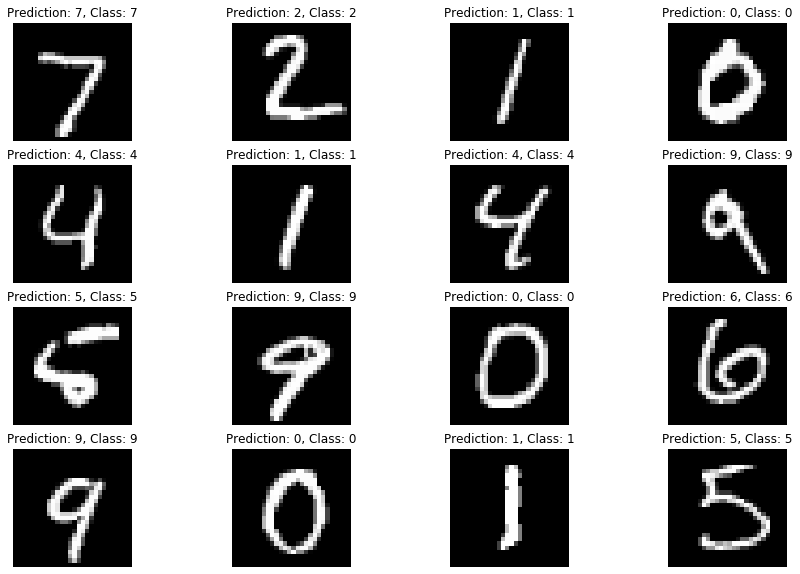

In [10]:
# Here we'll plot the images with their classification and the prediction from the first architecture
# This is done in the test set

architeture1.fit(X_train, y_train)

fig, ax = plt.subplots(4, 4, figsize = (15, 10))

prediction = architeture1.predict(X_test[:16, :])

for i in range(16):
    ax[i//4, i%4].imshow(X_test[i].reshape(28,28), cmap='gray') # This command "plots" an array based on its entries values
    ax[i//4, i%4].axis('off')
    ax[i//4, i%4].set_title("Prediction: %d, Class: %d"%(prediction[i],y_test[i]))

plt.show()

In [11]:
# A function to plot the classes distribution in the data

def distribution_plot(data):
        unique, counts = np.unique(data, return_counts=True)
        plt.bar(unique, counts, 0.5)
        plt.title('Class Frequency')
        plt.xlabel('Class')
        plt.ylabel('Frequency')
        plt.show()

In [12]:
# A function to train the network

def train_network(architeture, k_fold, train_X, train_y):
    
    train_score_history = []
    test_score_history = []
    iteration = 1

    # We train the set in each validation
    for train_index, test_index in k_fold.split(train_X, train_y):
        
        print("Fold number", iteration, ":")
        iteration += 1
        
        # Distribution of classes in the trainig set
        print('Training set distribution')
        distribution_plot(train_y[train_index])
        
        # Distribution of classes in the test set
        print('Test set distribution')
        distribution_plot(train_y[test_index])
        
        # Training data to be used in this iteration
        fold_train_X, fold_test_X = train_X[train_index], train_X[test_index]
        fold_train_y, fold_test_y = train_y[train_index], train_y[test_index]
        
        # Fitting the architecture
        architeture.fit(fold_train_X, fold_train_y)    
              
        # Score for this particular iteration
        train_score = architeture.score(fold_train_X, fold_train_y)
        test_score = architeture.score(fold_test_X, fold_test_y)
        print('Scores:')
   
        print('Train score', train_score)
        print('Test score', test_score)
        
        # Appending it to the history
        train_score_history.append(train_score)
        test_score_history.append(test_score)
        
    return [train_score_history, test_score_history]

In [13]:
# Here we plot the maximum accuracy obtained in the training and its history

def plot_training_data(data):
    
    # Maximum accuracy in the history
    print('Max training accuracy history:', max(data[0]))
    print('Max test accuracy history:', max(data[1]))
    
    # Dividing the data into the appropriate format and setting up the table
    columnheaders=['Training Accuracy', 'Test Accuracy']
    the_table=plt.table(cellText=list(map(list, zip(*data))),loc='center', colLabels = columnheaders, cellLoc='center')
    
    # Table configuration
    plt.axis("off")
    the_table.set_fontsize(10)
    the_table.scale(1, 2)
    
    plt.show()

## First Architeture

Fold number 1 :
Training set distribution


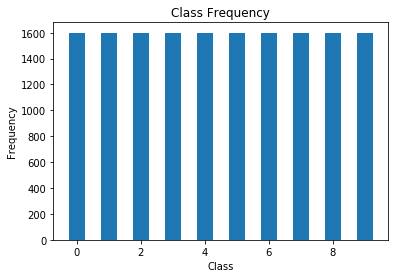

Test set distribution


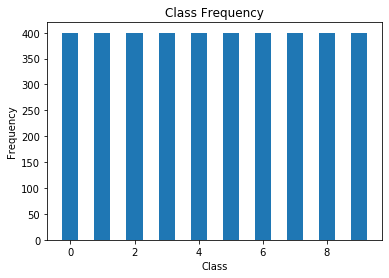

/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Scores:
Train score 0.9958125
Test score 0.9595
Fold number 2 :
Training set distribution


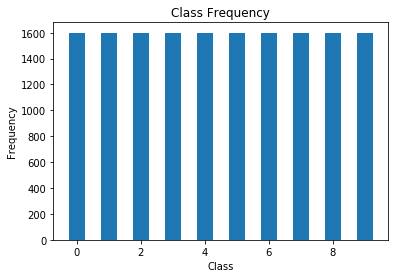

Test set distribution


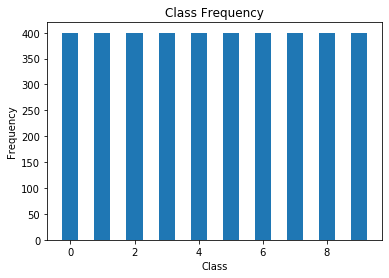

/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Scores:
Train score 0.9956875
Test score 0.96325
Fold number 3 :
Training set distribution


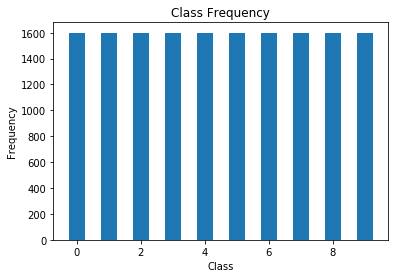

Test set distribution


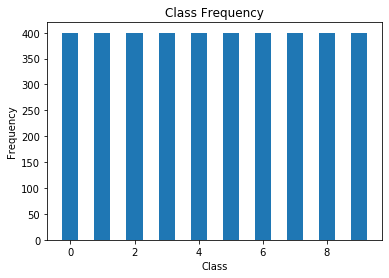

/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Scores:
Train score 0.9961875
Test score 0.96425
Fold number 4 :
Training set distribution


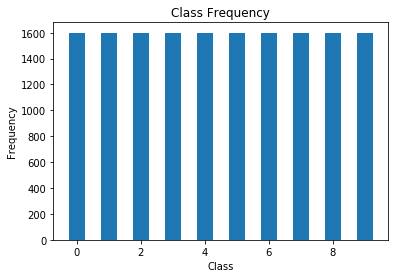

Test set distribution


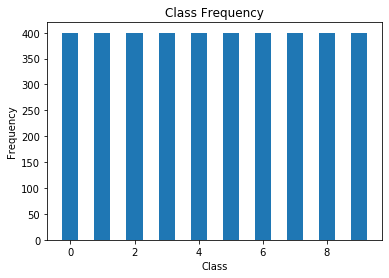

/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Scores:
Train score 0.996125
Test score 0.96475
Fold number 5 :
Training set distribution


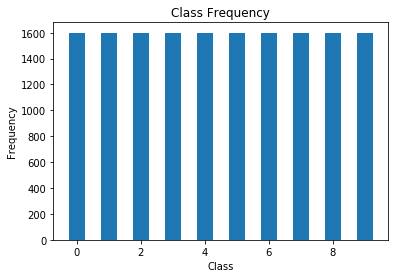

Test set distribution


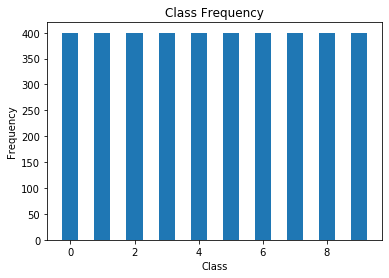

/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Scores:
Train score 0.9951875
Test score 0.965


In [14]:
first_training = train_network(architeture1, skf, X_train, y_train)

Max training accuracy history: 0.9961875
Max test accuracy history: 0.965


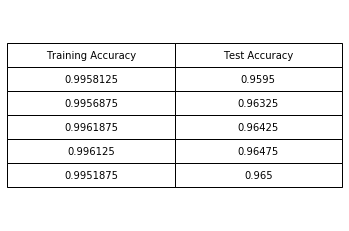

In [15]:
plot_training_data(first_training)

## Second Architeture

Fold number 1 :
Training set distribution


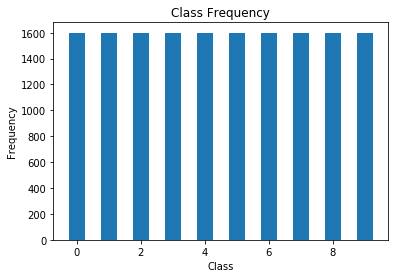

Test set distribution


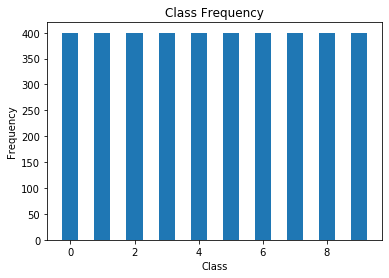

/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Scores:
Train score 0.9790625
Test score 0.9435
Fold number 2 :
Training set distribution


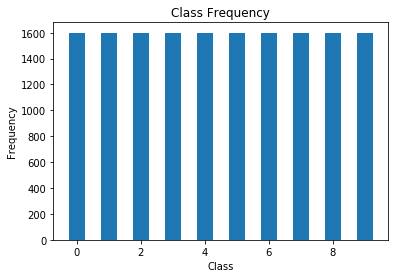

Test set distribution


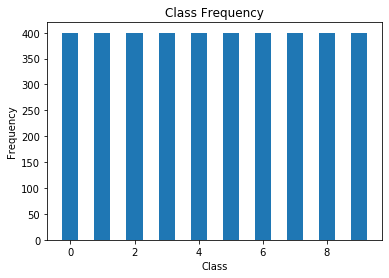

/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Scores:
Train score 0.977
Test score 0.947
Fold number 3 :
Training set distribution


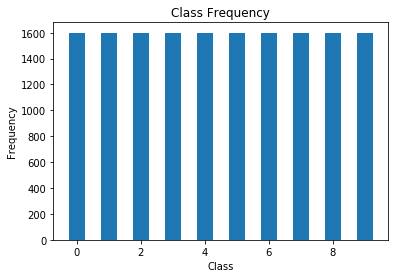

Test set distribution


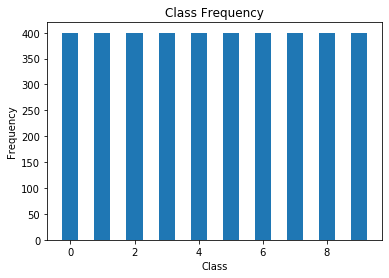

/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Scores:
Train score 0.9783125
Test score 0.9505
Fold number 4 :
Training set distribution


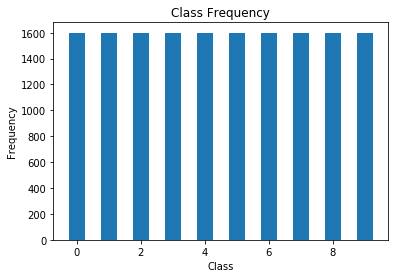

Test set distribution


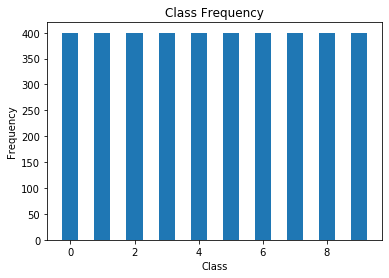

/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Scores:
Train score 0.98075
Test score 0.94975
Fold number 5 :
Training set distribution


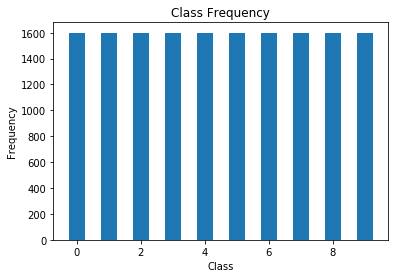

Test set distribution


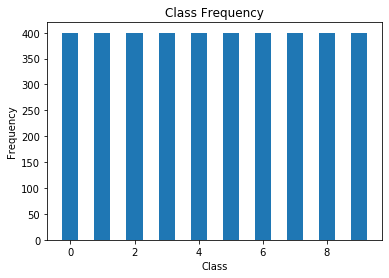

/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Scores:
Train score 0.9801875
Test score 0.94775


In [16]:
second_training = train_network(architeture2, skf, X_train, y_train)

Max training accuracy history: 0.98075
Max test accuracy history: 0.9505


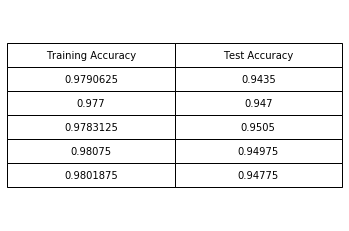

In [17]:
plot_training_data(second_training)

## Third Architeture

Fold number 1 :
Training set distribution


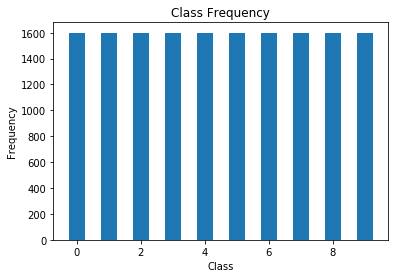

Test set distribution


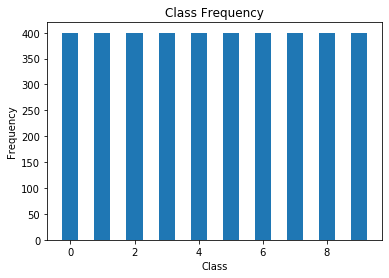

Scores:
Train score 0.9540625
Test score 0.9255
Fold number 2 :
Training set distribution


/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


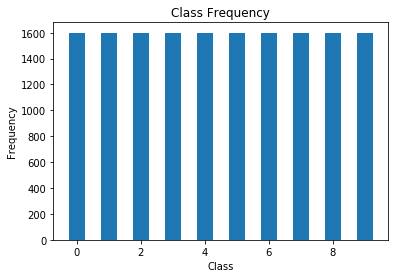

Test set distribution


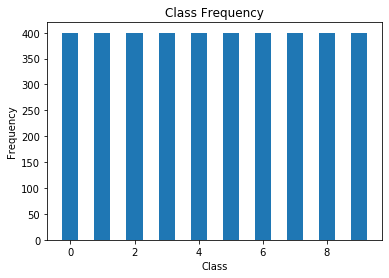

/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Scores:
Train score 0.945125
Test score 0.9245
Fold number 3 :
Training set distribution


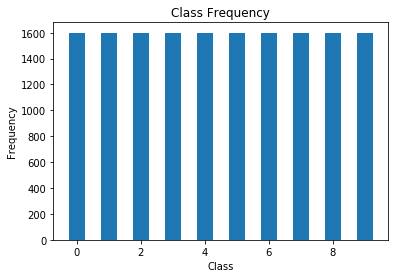

Test set distribution


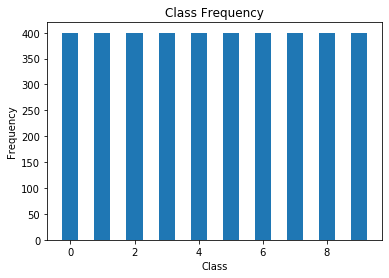

/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Scores:
Train score 0.9518125
Test score 0.931
Fold number 4 :
Training set distribution


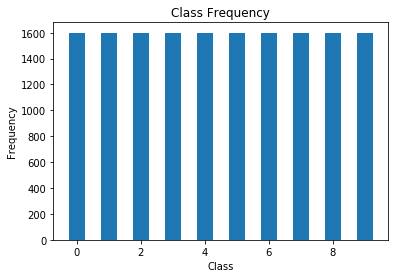

Test set distribution


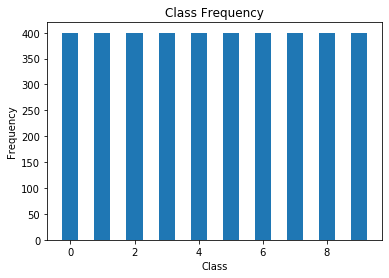

/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Scores:
Train score 0.950625
Test score 0.93
Fold number 5 :
Training set distribution


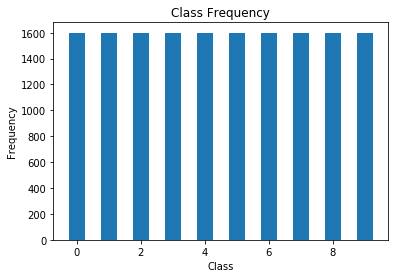

Test set distribution


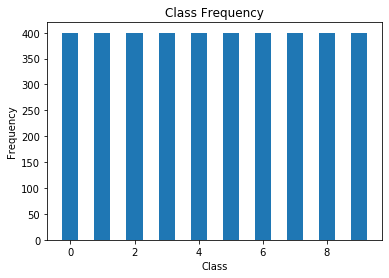

Scores:
Train score 0.953
Test score 0.93525


/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [18]:
third_training = train_network(architeture3, skf, X_train, y_train)

Max training accuracy history: 0.9540625
Max test accuracy history: 0.93525


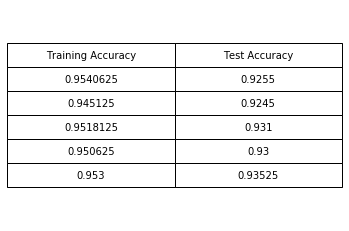

In [19]:
plot_training_data(third_training)

## Fourth Architeture

Fold number 1 :
Training set distribution


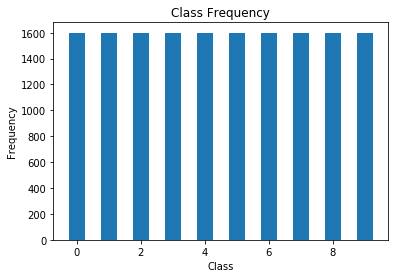

Test set distribution


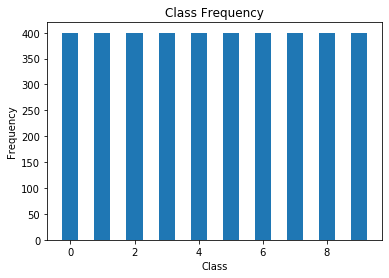

/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Scores:
Train score 0.957375
Test score 0.928
Fold number 2 :
Training set distribution


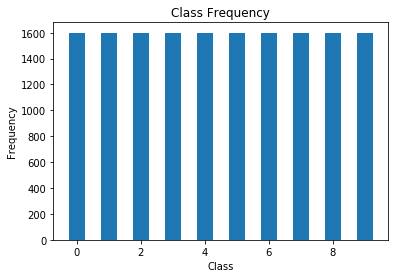

Test set distribution


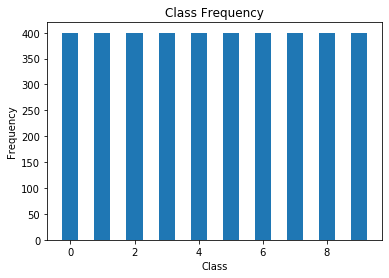

/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Scores:
Train score 0.9549375
Test score 0.93525
Fold number 3 :
Training set distribution


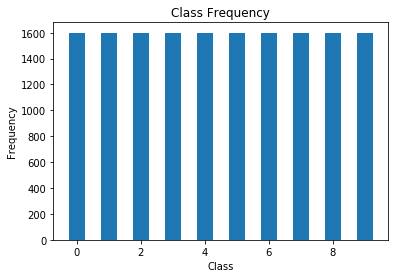

Test set distribution


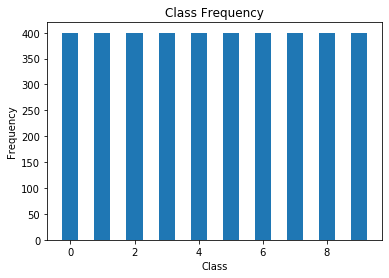

/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Scores:
Train score 0.955125
Test score 0.931
Fold number 4 :
Training set distribution


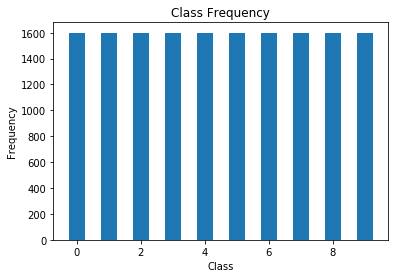

Test set distribution


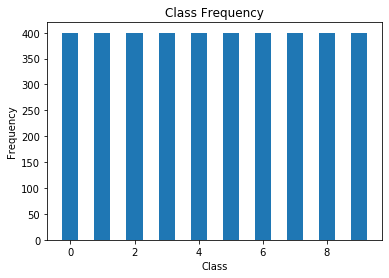

/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Scores:
Train score 0.957375
Test score 0.92725
Fold number 5 :
Training set distribution


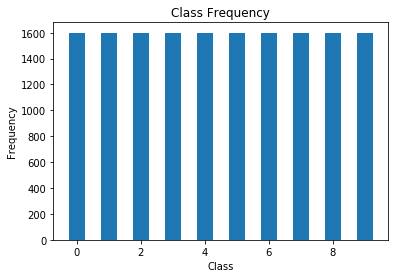

Test set distribution


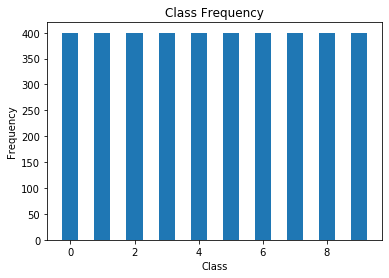

Scores:
Train score 0.954125
Test score 0.9295


/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [20]:
fourth_training = train_network(architeture4, skf, X_train, y_train)

Max training accuracy history: 0.957375
Max test accuracy history: 0.93525


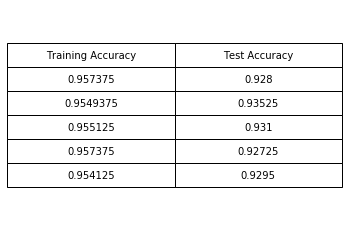

In [21]:
plot_training_data(fourth_training)

# Part 3 - Study of the Selected Model

We'll proceed with the first architeture

In [22]:
chosen_architeture = architeture1
chosen_architeture.fit(X_train,y_train)

/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(512,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

First we plot the number of examples in each class for the test set in a histogram:

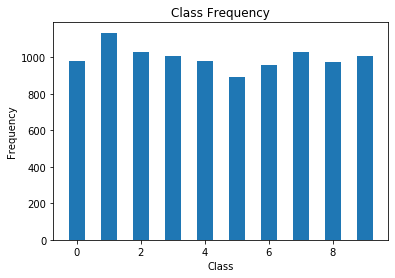

In [23]:
distribution_plot(y_test)

Now we plot the confusion matrix, in the same spirit as we did in the previous assignment, to check where our model is failing (in the previous assignment we were dealing with binary classification, so we could use the confusion matrix to check the number of false positives and false negatives, the idea here is the same):

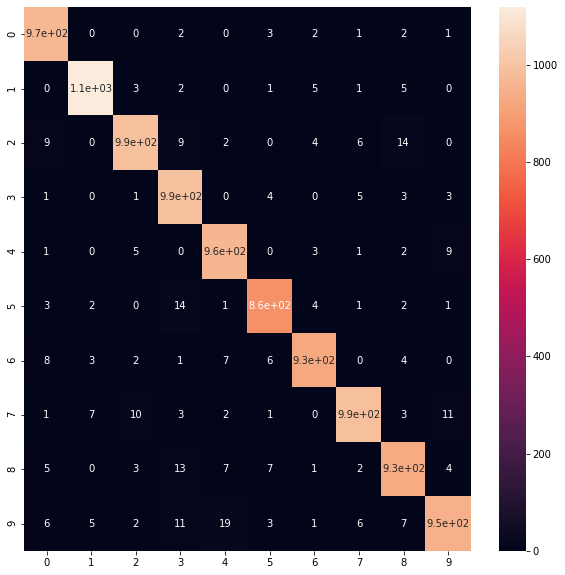

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_prediction = chosen_architeture.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_prediction)

plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, annot = True)

Finally, we try to plot the learning curve

Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html

In [25]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(chosen_architeture, 
                                                        X_train, 
                                                        y_train,
                                                        cv = 5 ,
                                                        scoring='accuracy',
                                                        n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 15))

Plotting it:

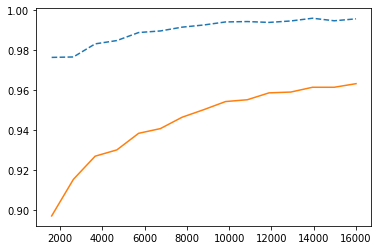

In [26]:
train_set_mean = np.mean(train_scores, axis=1)
test_set_mean = np.mean(test_scores, axis=1)

# Plot data
plt.plot(train_sizes, train_set_mean, '--',  label="Training score")
plt.plot(train_sizes, test_set_mean, label="Test score")

So we can see how the accuracy increases with the set size